# Question 1

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten,  BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
def build_cnn_model(input_shape=(32, 32, 3),num_filters=[128,128,128,128,128],filter_sizes=[(3, 3)]*5,activations=['relu']*5,pool_size=(2, 2),dense_neurons=1024,num_classes=10):

    model = Sequential()

    # Add 5 conv-relu-maxpool blocks
    for i in range(5):
        if i == 0:
            # First layer needs input_shape
            model.add(Conv2D(num_filters[i], filter_sizes[i], input_shape=input_shape, padding='same'))
        else:
            model.add(Conv2D(num_filters[i], filter_sizes[i], padding='same'))
        model.add(Activation(activations[i]))
        model.add(MaxPooling2D(pool_size=pool_size))

    # Flatten the output for dense layers
    model.add(Flatten())

    # Dense layer
    model.add(Dense(dense_neurons, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [ ]:


# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = build_cnn_model()

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 736,266 (2.81 MB)

 Trainable params: 736,266 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Train the model with early stopping
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=100,  # Set high to allow early stopping to control
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.2637 - loss: 1.9436 - val_accuracy: 0.4926 - val_loss: 1.3892
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5394 - loss: 1.2573 - val_accuracy: 0.6005 - val_loss: 1.1358
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6403 - loss: 1.0078 - val_accuracy: 0.6728 - val_loss: 0.9407
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7097 - loss: 0.8306 - val_accuracy: 0.6904 - val_loss: 0.8857
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7551 - loss: 0.6931 - val_accuracy: 0.7268 - val_loss: 0.8054
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7972 - loss: 0.5791 - val_accuracy: 0.7143 - val_loss: 0.8440
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8217 - loss: 0.5064 - val_accuracy: 0.7391 - val_loss: 0.8185
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8499 - loss: 0.4188 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')


Test Accuracy: 0.7325, Test Loss: 0.8260


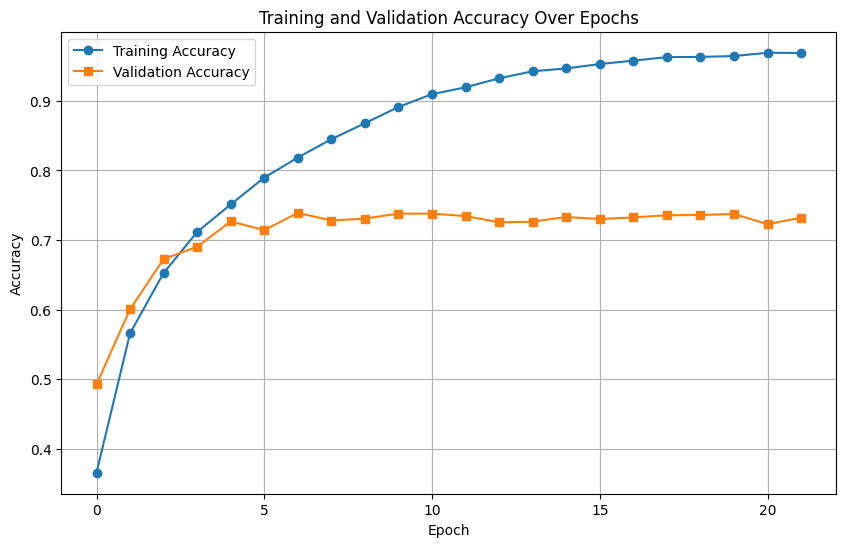

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig('accuracy_plot.png')

# Question 2

In [ ]:
# Define optimizers
optimizers = [
    ('SGD', SGD(learning_rate=0.01, momentum=0.9)),
    ('RMSprop', RMSprop(learning_rate=0.001)),
    ('Adam', Adam(learning_rate=0.001))
]

In [ ]:
results = []

for opt_name, optimizer in optimizers:
  print(f"\nTraining with optimizer: {opt_name}")

  model = build_cnn_model()

  model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  early_stopping = EarlyStopping(
  monitor='val_accuracy',
  patience=15,
  restore_best_weights=True,
  verbose=1)


  history = model.fit(
      x_train, y_train,
      batch_size=128,
      epochs=100,
      validation_split=0.2,
      callbacks=[early_stopping],
      verbose=1
  )


  test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
  print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

  model.save(f'cifar10_model_{opt_name}.keras')


  results.append({
      'Optimizer': opt_name,
      'Test Accuracy': test_accuracy,
      'Test Loss': test_loss,
      'History': history.history
  })

results_df = pd.DataFrame({
    'Optimizer': [r['Optimizer'] for r in results],
    'Test Accuracy': [r['Test Accuracy'] for r in results],
    'Test Loss': [r['Test Loss'] for r in results]
})

results_df.to_csv('optimizer_results.csv')


Training with optimizer: SGD
Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.1492 - loss: 2.2444 - val_accuracy: 0.3191 - val_loss: 1.8909
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3389 - loss: 1.7963 - val_accuracy: 0.4396 - val_loss: 1.5262
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4573 - loss: 1.4836 - val_accuracy: 0.5242 - val_loss: 1.3078
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5332 - loss: 1.2896 - val_accuracy: 0.5690 - val_loss: 1.2171
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5829 - loss: 1.1626 - val_accuracy: 0.5917 - val_loss: 1.1500
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6398 - loss: 1.0145 - val_accuracy: 0.6230 - val_loss: 1.0615
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6818 - loss: 0.8967 - val_accuracy: 0.6841 - val_loss: 0.9035
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accu

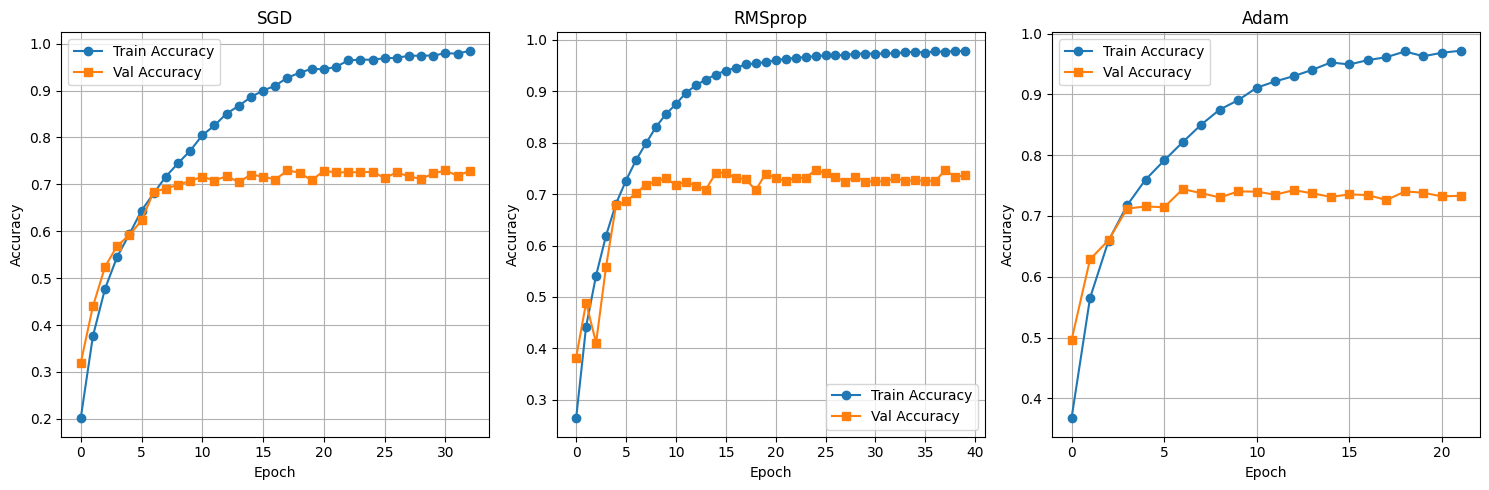

In [ ]:

plt.figure(figsize=(15, 5))  # Adjusted for 1x3 layout
for i, result in enumerate(results):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns
    plt.plot(result['History']['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(result['History']['val_accuracy'], label='Val Accuracy', marker='s')
    plt.title(f'{result["Optimizer"]}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.savefig('optimizers_training_history.png')

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


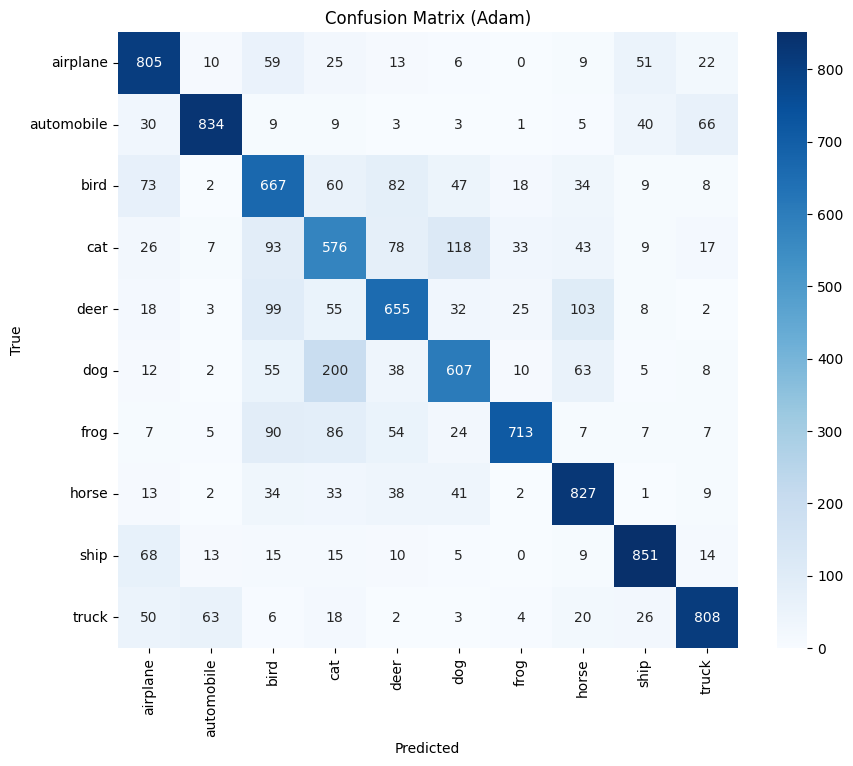

In [ ]:
best_result = max(results, key=lambda x: x['Test Accuracy'])
best_opt_name = best_result['Optimizer']
best_model = tf.keras.models.load_model(f'cifar10_model_{best_opt_name}.keras')
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix ({best_opt_name})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_best.png')

## Question 3

In [ ]:
def build_cnn_model(
    input_shape=(32, 32, 3),
    num_filters=[128]*5,  # m = 128 filters in each layer
    filter_sizes=[(3, 3)]*5,  # k = 3 (3x3 filters)
    activations=['relu']*5,
    pool_size=(2, 2),
    dense_neurons=1024,  # n = 1024 neurons in dense layer
    num_classes=10,
    use_batch_norm=False
):
    model = Sequential()
    for i in range(5):
        if i == 0:
            model.add(Conv2D(num_filters[i], filter_sizes[i], input_shape=input_shape, padding='same'))
        else:
            model.add(Conv2D(num_filters[i], filter_sizes[i], padding='same'))
        if use_batch_norm:
            model.add(BatchNormalization())
        model.add(Activation(activations[i]))
        model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Activation('relu'))
    if use_batch_norm:
        model.add(BatchNormalization())
    model.add(Dense(dense_neurons))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [ ]:
configs = [
    {'name': 'Without BatchNorm', 'use_batch_norm': False},
    {'name': 'With BatchNorm', 'use_batch_norm': True}
]

In [ ]:
# Store results
results = []

# Train and evaluate model for each configuration
for config in configs:
    print(f"\n=== Training {config['name']} ===")

    # Build model
    model = build_cnn_model(use_batch_norm=config['use_batch_norm'])

    # Compile model
    if config['use_batch_norm']:
      model.compile(optimizer=Adam(learning_rate=0.01),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    else:
      model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


    # Print model summary
    model.summary()

    # Define early stopping
    early_stopping = EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    # Train model
    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=1)

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{config['name']} Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}\n")

    # Store history and config
    results.append({
        'Name': config['name'],
        'History': history.history,
        'Test_Accuracy': test_accuracy,
        'Test_Loss': test_loss
    })


=== Training Without BatchNorm ===


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)              │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_88 (Activation)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_89 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_90 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_91 (Activation)      │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_92 (Activation)      │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_93 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 736,266 (2.81 MB)

 Trainable params: 736,266 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.2883 - loss: 1.8763 - val_accuracy: 0.5365 - val_loss: 1.2880
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5595 - loss: 1.2171 - val_accuracy: 0.6426 - val_loss: 1.0056
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6695 - loss: 0.9310 - val_accuracy: 0.6808 - val_loss: 0.9311
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7310 - loss: 0.7693 - val_accuracy: 0.7090 - val_loss: 0.8218
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7735 - loss: 0.6503 - val_accuracy: 0.7242 - val_loss: 0.7873
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8049 - loss: 0.5538 - val_accuracy: 0.7159 - val_loss: 0.8430
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8308 - loss: 0.4793 - val_accuracy: 0.7315 - val_loss: 0.8074
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8584 - loss: 0.4017 -

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_85 (Conv2D)              │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_94 (Activation)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_85 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_95 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_86 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_96 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_87 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_97 (Activation)      │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_88 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_98 (Activation)      │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_89 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_99 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 739,338 (2.82 MB)

 Trainable params: 737,802 (2.81 MB)

 Non-trainable params: 1,536 (6.00 KB)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.3126 - loss: 2.5176 - val_accuracy: 0.3549 - val_loss: 1.7443
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5515 - loss: 1.2550 - val_accuracy: 0.3601 - val_loss: 2.0166
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6782 - loss: 0.9157 - val_accuracy: 0.6114 - val_loss: 1.1886
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7440 - loss: 0.7204 - val_accuracy: 0.5688 - val_loss: 1.3320
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7921 - loss: 0.5919 - val_accuracy: 0.5994 - val_loss: 1.4410
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8218 - loss: 0.5069 - val_accuracy: 0.7393 - val_loss: 0.7762
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8546 - loss: 0.4177 - val_accuracy: 0.6956 - val_loss: 1.0485
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8802 - loss: 0.34

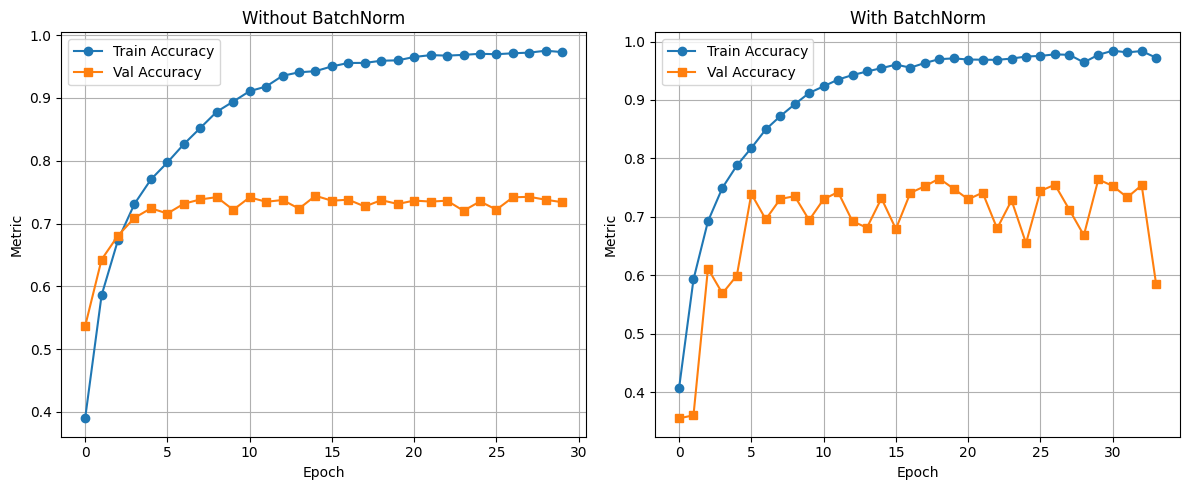

In [ ]:
# Plot training and validation loss/accuracy in a single row
plt.figure(figsize=(12, 5))
for i, result in enumerate(results):
    # Accuracy subplot
    plt.subplot(1, 2, i + 1)
    plt.plot(result['History']['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(result['History']['val_accuracy'], label='Val Accuracy', marker='s')
    plt.title(f"{result['Name']}")
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.savefig('batchnorm_comparison.png')

# Question 4

In [ ]:
# Generate a more complex dataset with higher non-linearity and noise
np.random.seed(42)
n_samples = 1000
X1 = 2 * np.random.rand(n_samples, 1) - 1
X2 = 3 * np.random.rand(n_samples, 1) - 1.5
X3 = np.random.rand(n_samples, 1)
X = np.hstack([X1, X2, X3])

# Complex non-linear target: y = 2*x1^2 + 3*x2 + 0.5*x3 + sin(x1*x2) + 0.1*x1*x3^2 + noise
y = (2 * X1**2 + 3 * X2 + 0.5 * X3 + np.sin(X1 * X2) + 0.1 * X1 * X3**2 +
     0.2 * np.random.randn(n_samples, 1))

# Standardize features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std
X_b = np.c_[np.ones((n_samples, 1)), X]

In [ ]:
# Neural network model (1 hidden layer with ReLU)
def forward(X, theta1, theta2):
    hidden = np.maximum(0, X @ theta1)  # ReLU activation
    output = hidden @ theta2
    return output

def compute_loss(X, y, theta1, theta2):
    m = len(y)
    predictions = forward(X, theta1, theta2)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

def compute_gradients(X, y, theta1, theta2):
    m = len(y)
    hidden = np.maximum(0, X @ theta1)
    predictions = hidden @ theta2
    errors = predictions - y

    d_theta2 = (1 / m) * hidden.T @ errors
    d_hidden = errors @ theta2.T
    d_theta1 = (1 / m) * X.T @ (d_hidden * (hidden > 0))

    return d_theta1, d_theta2

# Gradient Descent Variants with learning rate scheduling
def gradient_descent(X, y, theta1_init, theta2_init, n_iterations):
    theta1, theta2 = theta1_init.copy(), theta2_init.copy()
    loss_history = []
    for i in range(n_iterations):
        lr = 0.01 / (1 + i / 1000)  # Learning rate decay
        d_theta1, d_theta2 = compute_gradients(X, y, theta1, theta2)
        theta1 -= lr * d_theta1
        theta2 -= lr * d_theta2
        loss = compute_loss(X, y, theta1, theta2)
        loss_history.append(loss)
    return theta1, theta2, loss_history

def stochastic_gradient_descent(X, y, theta1_init, theta2_init, n_iterations):
    theta1, theta2 = theta1_init.copy(), theta2_init.copy()
    loss_history = []
    m = len(y)
    for i in range(n_iterations):
        lr = 0.01 / (1 + i / 1000)
        for _ in range(m):
            idx = np.random.randint(m)
            xi = X[idx:idx+1]
            yi = y[idx:idx+1]
            d_theta1, d_theta2 = compute_gradients(xi, yi, theta1, theta2)
            theta1 -= lr * d_theta1
            theta2 -= lr * d_theta2
        loss = compute_loss(X, y, theta1, theta2)
        loss_history.append(loss)
    return theta1, theta2, loss_history

def mini_batch_gradient_descent(X, y, theta1_init, theta2_init, n_iterations, batch_size):
    theta1, theta2 = theta1_init.copy(), theta2_init.copy()
    loss_history = []
    m = len(y)
    for i in range(n_iterations):
        lr = 0.01 / (1 + i / 1000)
        indices = np.random.permutation(m)
        X_shuffled, y_shuffled = X[indices], y[indices]
        for j in range(0, m, batch_size):
            xi = X_shuffled[j:j+batch_size]
            yi = y_shuffled[j:j+batch_size]
            d_theta1, d_theta2 = compute_gradients(xi, yi, theta1, theta2)
            theta1 -= lr * d_theta1
            theta2 -= lr * d_theta2
        loss = compute_loss(X, y, theta1, theta2)
        loss_history.append(loss)
    return theta1, theta2, loss_history

In [ ]:
# Parameters
input_size, hidden_size, output_size = 4, 10, 1
theta1_init = np.random.randn(input_size, hidden_size) * 0.01
theta2_init = np.random.randn(hidden_size, output_size) * 0.01
n_iterations = 1000
batch_size = 32


In [ ]:
theta1_gd, theta2_gd, loss_gd = gradient_descent(X_b, y, theta1_init, theta2_init, n_iterations)
theta1_sgd, theta2_sgd, loss_sgd = stochastic_gradient_descent(X_b, y, theta1_init, theta2_init, n_iterations)
theta1_mbgd, theta2_mbgd, loss_mbgd = mini_batch_gradient_descent(X_b, y, theta1_init, theta2_init, n_iterations, batch_size)

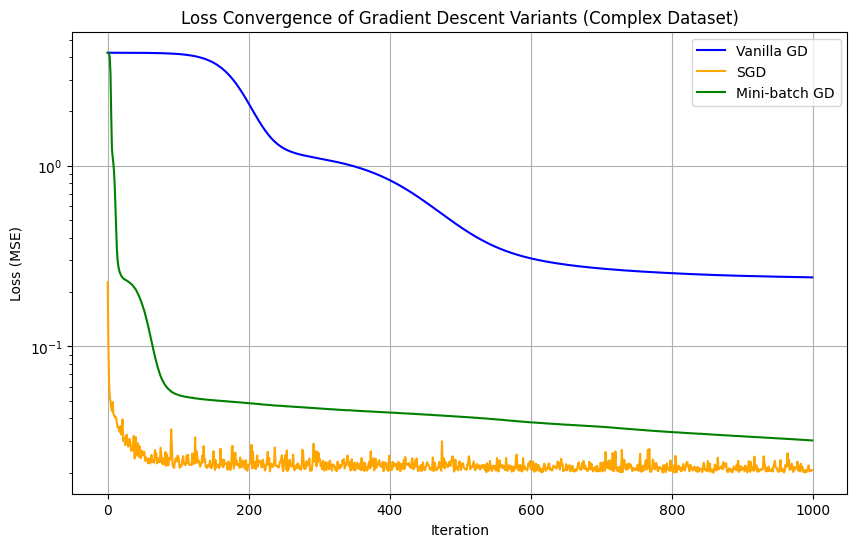

In [ ]:
# Plotting convergence
plt.figure(figsize=(10, 6))
plt.plot(loss_gd, label='Vanilla GD', color='blue')
plt.plot(loss_sgd, label='SGD', color='orange')
plt.plot(loss_mbgd, label='Mini-batch GD', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Loss Convergence of Gradient Descent Variants (Complex Dataset)')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Log scale to highlight differences
plt.savefig('loss_convergence_improved.png')

# Question 5

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import matplotlib.pyplot as plt

In [11]:
# Define the model-building function for KerasTuner
def build_cnn_model(hp):
    model = Sequential()

    # Fixed number of convolutional layers (5 as requested)
    num_conv_layers = 5

    # Input shape for CIFAR-10
    input_shape = (32, 32, 3)

    # Add convolutional layers with tuned filters
    for i in range(num_conv_layers):
        # Test 2 filter configurations per layer based on previous best [192, 96, 192, 224, 128]
        if i == 0:
            num_filters = hp.Choice(f'filters_{i}', values=[192, 224], default=192)
        elif i == 1:
            num_filters = hp.Choice(f'filters_{i}', values=[96, 128], default=96)
        elif i == 2:
            num_filters = hp.Choice(f'filters_{i}', values=[192, 224], default=192)
        elif i == 3:
            num_filters = hp.Choice(f'filters_{i}', values=[224, 256], default=224)
        else:  # i == 4
            num_filters = hp.Choice(f'filters_{i}', values=[96, 128], default=128)
        filter_size = (3, 3)
        if i == 0:
            model.add(Conv2D(num_filters, filter_size, input_shape=input_shape, padding='same'))
        else:
            model.add(Conv2D(num_filters, filter_size, padding='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fixed dense neurons (best value: 256)
    dense_neurons = 256
    model.add(Dense(dense_neurons))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Fixed dropout rate (best value: 0.4)
    dropout_rate = 0.4
    model.add(Dropout(dropout_rate))

    # Output layer for 10 classes
    model.add(Dense(10, activation='softmax'))

    # Test 2 learning rates around best value (0.0056886)
    learning_rate = hp.Choice('learning_rate', values=[0.005, 0.006], default=0.005)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [12]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define batch sizes to test (fixed at best assumed value, 128, with slight variation)
# Define batch size (fixed at 128)
batch_size = 128

In [14]:
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Define the tuner
tuner = kt.Hyperband(
    build_cnn_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    hyperband_iterations=1,
    directory='kerastuner_dir',
    project_name='cifar10_tuning_minimized_5layers',
    overwrite=True
)

# Perform the hyperparameter search
tuner.search(
    x_train, y_train,
    epochs=30,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model to get the history
history = best_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)

# Print the best hyperparameters
print("\n=== Best Hyperparameters ===")
print(f"Batch Size: {batch_size}")
print(f"Number of Convolutional Layers: 5")
for i in range(5):
    print(f"Filters in Conv Layer {i}: {best_hps.get(f'filters_{i}')}")
print(f"Dense Neurons: 256")
print(f"Dropout Rate: 0.4")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"Best Model Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}\n")

Trial 30 Complete [00h 01m 53s]
val_accuracy: 0.7605000138282776

Best val_accuracy So Far: 0.7605000138282776
Total elapsed time: 00h 27m 23s
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.3849 - loss: 1.7092 - val_accuracy: 0.3482 - val_loss: 2.0150
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.6328 - loss: 1.0250 - val_accuracy: 0.3847 - val_loss: 2.4220
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7202 - loss: 0.8032 - val_accuracy: 0.5994 - val_loss: 1.2421
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.7708 - loss: 0.6593 - val_accuracy: 0.6947 - val_loss: 0.9138
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8159 - loss: 0.5314 - val_accuracy: 0.6958 - val_loss: 0.9895
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8513 - loss: 0.4356 - val_accuracy: 0.7179 - val_loss: 0.8667
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8875 - loss

In [20]:
# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)

# Print the best hyperparameters
print("\n=== Best Hyperparameters ===")
print(f"Batch Size: {batch_size}")
print(f"Number of Convolutional Layers: 5")
for i in range(5):
    print(f"Filters in Conv Layer {i}: {best_hps.get(f'filters_{i}')}")
print(f"Dense Neurons: 256")
print(f"Dropout Rate: 0.4")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"Best Model Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}\n")

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.3669 - loss: 1.7802 - val_accuracy: 0.3976 - val_loss: 1.7608
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6346 - loss: 1.0291 - val_accuracy: 0.5086 - val_loss: 1.6898
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7226 - loss: 0.7937 - val_accuracy: 0.4534 - val_loss: 2.1777
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.7768 - loss: 0.6489 - val_accuracy: 0.6506 - val_loss: 1.0673
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8169 - loss: 0.5292 - val_accuracy: 0.5765 - val_loss: 1.5307
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8520 - loss: 0.4279 - val_accuracy: 0.6577 - val_loss: 1.0593
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8858 - loss: 0.3301 - val_accuracy: 0.6502 - val_loss: 1.1372
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9083 - loss: 0.2698 - va

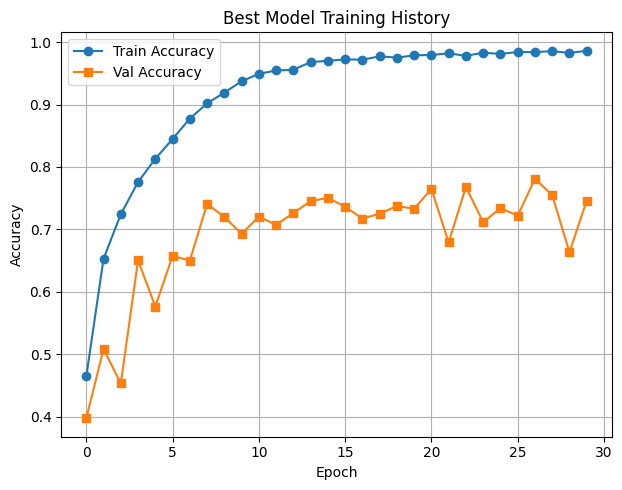

In [23]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='s')
plt.title('Best Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.savefig('best_model_history_minimized_5layers.png')